In [40]:
import numpy as np  # Autovalores
import pandas as pd  # Dataframes/Tablas de valores
import matplotlib.pyplot as plt


In [7]:
# Obtener los datos
datos_originales = pd.read_excel("notas.xlsx")
# Escoger las columnas que nos interesan
datos = pd.DataFrame(
    datos_originales, columns=["al", "md", "cal", "sist", "prog", "redes"]
)


In [9]:
# Transformar en matriz (Array)
X = datos.values

# Notas de AL
X[:, 0]


array([5.6, 5.9, 4.2, 1.5, 3.6, 6.5, 7.7, 3.9, 4. , 7. , 6.3, 5. , 2.4,
       7. , 4.4, 7.8, 8.2, 5.3, 4.1, 4.2, 6.5, 3.3, 5.5, 7. , 6.8, 4.5,
       5.6])

In [10]:
# Matriz de correlaciones
datos.corr()


al        md       cal      sist      prog     redes
al     1.000000  0.788049  0.545904 -0.585206 -0.553233 -0.457926
md     0.788049  1.000000  0.616393 -0.415141 -0.580055 -0.406179
cal    0.545904  0.616393  1.000000 -0.549227 -0.673353 -0.643744
sist  -0.585206 -0.415141 -0.549227  1.000000  0.606589  0.686314
prog  -0.553233 -0.580055 -0.673353  0.606589  1.000000  0.677602
redes -0.457926 -0.406179 -0.643744  0.686314  0.677602  1.000000

In [14]:
# Vector de medias
medias = datos.agg([np.mean])
medias


al        md       cal      sist      prog     redes
mean  5.325926  5.062963  5.755556  5.759259  6.144444  6.414815

In [18]:
# Matriz de covarianzas (como matriz)
covarianzas = datos.cov()
V = np.asarray(covarianzas)


In [19]:
# Autovalores y autovectores
aval, avec = np.linalg.eigh(V)
aval, avec


(array([ 0.43032199,  0.68200636,  0.84633318,  1.49787393,  2.78751315,
        12.60239015]),
 array([[ 0.54621727,  0.21451497, -0.4636542 ,  0.38663314, -0.37318752,
         -0.38974441],
        [-0.34009773, -0.33417966,  0.31268852, -0.09062121, -0.63069002,
         -0.51855691],
        [ 0.04285782,  0.08703214, -0.31884261, -0.72247247,  0.30624179,
         -0.52266385],
        [ 0.72376754, -0.25502043,  0.35723719, -0.41724221, -0.22068824,
          0.24639877],
        [-0.13383525, -0.60458905, -0.66513359, -0.12188771, -0.20251418,
          0.34393153],
        [-0.20589344,  0.63574314, -0.12477561, -0.36247548, -0.52864151,
          0.35639764]]))

In [30]:
# Factores de variabilidad
traza = sum(aval)
assert int(traza) == int(np.trace(V))
fv = aval / traza
# fv # Escojo los 2 últimos


In [32]:
# Nuevas variables
n_avec = avec[:, [5, 4]]
n_avec


array([[-0.38974441, -0.37318752],
       [-0.51855691, -0.63069002],
       [-0.52266385,  0.30624179],
       [ 0.24639877, -0.22068824],
       [ 0.34393153, -0.20251418],
       [ 0.35639764, -0.52864151]])

In [39]:
# Combinaciones lineales de las variables iniciales
Y = X @ n_avec
n = Y.shape[0]
n


27

Text(0, 0.5, 'Y2')

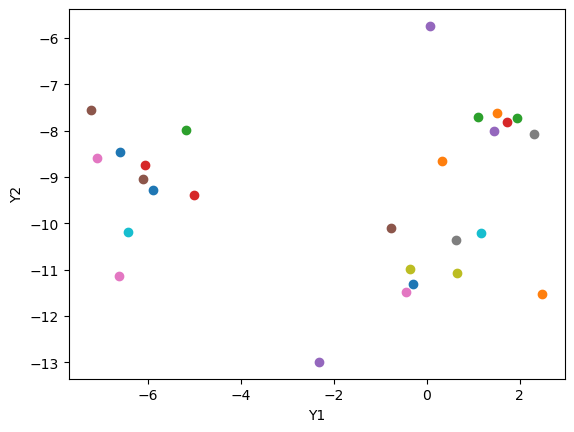

In [43]:
# Representamos los valores de las nuevas variables aleatorias
for i in range(n):
    plt.plot(Y[i, 0], Y[i, 1], "o")
plt.xlabel("Y1")
plt.ylabel("Y2")

# A partir de aquí se analiza la población (En este caso 2 grupos distinguidos)
